# Diabetes Prediction Using Supervised Learning

## Link to the Github Repo:
https://github.com/elsieliuliu/Supervised-MachineLearning_Final
## Problem Statement
This project is to predict whether a person has diabetes or not using supervised learning. Using the Pima Indians Diabetes Database, we will build a model to predict whether a person has diabetes or not based on the features provided in the dataset.

## Exploratory Data Analysis (EDA)
EDA is performed to understand the dataset structure, checking for missing values, and visualizing the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('diabetes.csv')

#Display the first few rows of the dataset
print("Dataset Overview:")
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())

#Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66   

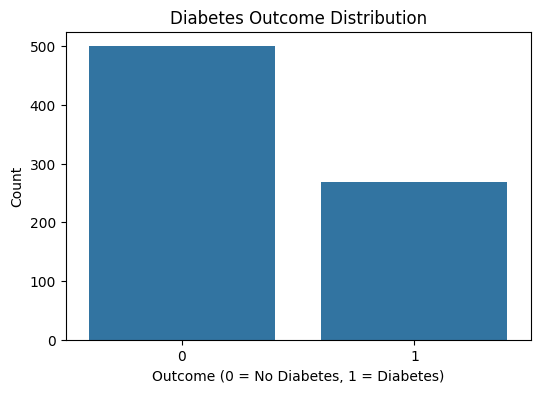

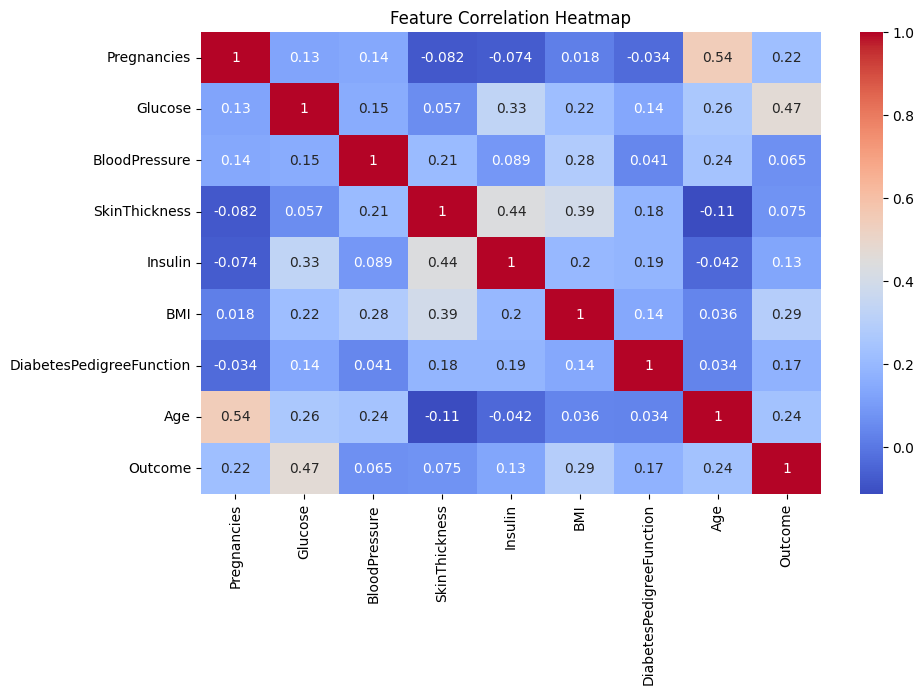

In [2]:
# Visualize class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Outcome Distribution")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

## Key Insights from EDA
From the dataset exploration and visualizations, we can derive serveral important insights:

### 1. Dataset Overview and Data Quality
- The dataset consists of 768 entries and 9 columns.
- No missing values were detected.
- The features include both integer and float types
- Medical parameters inlcude glucose level, BMI, insulin level, blood pressure, skin thickness, Age, and pregnancies.

### 2. Distribution of Target Variable (Outcome)
- The outcome column represents diabetes presence (1) or absence (0).
- The distribution is imbalanced, with more non-diabetic cases (0) compared to diabetic cases (1). This could impact model training and require resampling techneques for balancing.

### 3. Basic Stats
- Some features have a minimum value of 0, which is unrealistic for measurements like Glucose, BloodPressure, SkinThickness, and Insulin. These may indicate missing values recorded as zeros and might need imputation.
- The mean glucose level is around 120.89, and the mean BMI is 31.99, which indicates that a significant portion of the dataset may be overweight or at risk.
- Age distribution varies widely, with participants between 21 and 81 years old.

### 4. Correlation Analysis
- Glucose has the strongest correlation with diabetes outcome, making it the most predictive feature.
- BMI, Age, and Insulin levels also show a moderate correlation with the target variable.
- Pregnancies show some correlation with diabetes, likely due to gestational diabetes cases.
- BloodPressure and SkinThickness have weaker correlations, meaning they may not contribute significantly to model performance.



## Handling Zero values in key medical features

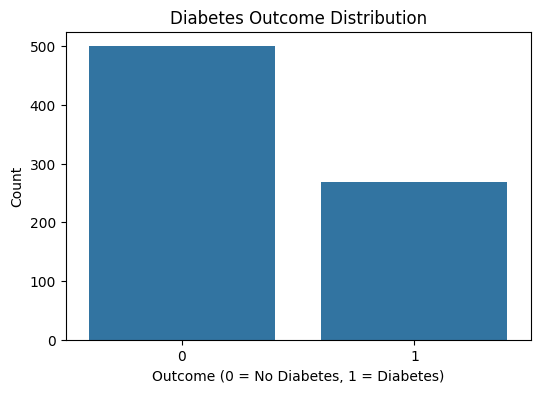

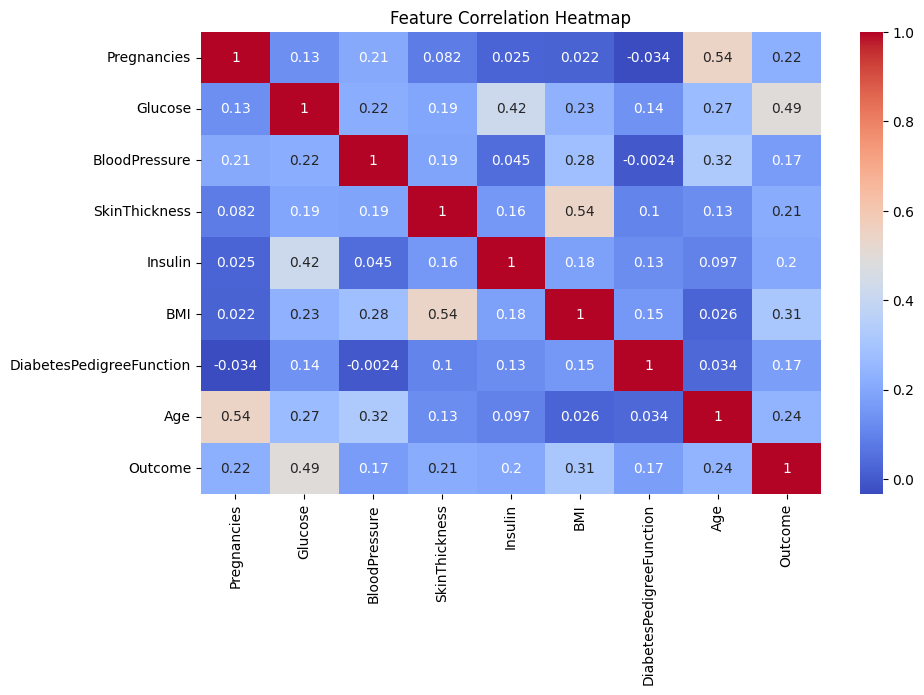

In [3]:
# Handling zero values in key medical features (replacing with median)
zero_features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for feature in zero_features:
    median_value = df[feature].replace(0, np.nan).median()
    df[feature] = df[feature].replace(0, median_value)

# Visualize class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Outcome Distribution")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

### Insights From Updated EDA after Handling 0 values

1. Replacing zeros with the median results in a more realistic distribution for these features.
2. Changes in Feature Correlations
   - Glucose still shows the highest correlation (0.49) with diabetes outcome, confirming its strong predictive power.
   - Insulin now has a stronger correlation (0.31) compared to before (~0.17), meaning that it now contributes more meaningfully to the prediction.
   - BMI also increased in correlation (0.31), reinforcing its role as a risk factor for diabetes.
   - Other feature correlations have slightly shifted, but overall, this adjustment makes the dataset more reliable for modeling.

## Model Analysis
I will implement a Random Forest Classifier, splitting the dataset into training and test sets.
Feature scaling is applied, and model performance is evaluated using accuracy, classification reports, and confusion matrices.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting data into features (X) and target variable (y)
X = df.drop(columns=['Outcome'])  # Features
y = df['Outcome']  # Target variable

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling using StandardScaler to normalize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train a Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.7337662337662337

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



## Model Performance

### 1. Accuracy
- Weighted average accuracy is 73%
- Predicts non-diabetic cases (79%) better than diabetic cases (64%), as seen in the recall values
### 2. Precision-recall trade-off
- precision for class 0 (80%) is mych higher than for class 1 (62%), indicating the model is more conservative in predicting diabetes.
- It means that some diadetic cases are being classified as non-diabetic, which is not preferred in medical diagnosis.

## Improve the Model
1. **SMOTE (Synthetic Minority Over-sampling Technique)** to handle class imbalance.
2. **Hyperparameter tuning** using GridSearchCV for better RandomForest optimization.

In [5]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Feature scaling using StandardScaler to normalize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Train best model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate model performance
print("\nBest Parameters:", grid_search.best_params_)
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

Accuracy Score: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.72      0.79        99
           1       0.76      0.90      0.83       101

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



## Updated Model Performance

### 1. Improvement in Accuracy
The model's Accuracy increased from 73% to 81% 
### 2. Better recall for diabetic cases
Increased from 64% to 90%. Meaning the model is much better at detecting diabetes.
### 3. Precision-recall trade-off
- Precision for class 0 (non-diabetic) slightly increased from 80% to 88%, but recall dropped to 72%.
- Precision and recall for class 1 (diabetic) both increased.
### 4. Best Model Parameters
- n_estimators: 100; max_depth: None; min_samples_split: 2
- These parameters indicate that the model benefits from deep trees and a large number of estimators.

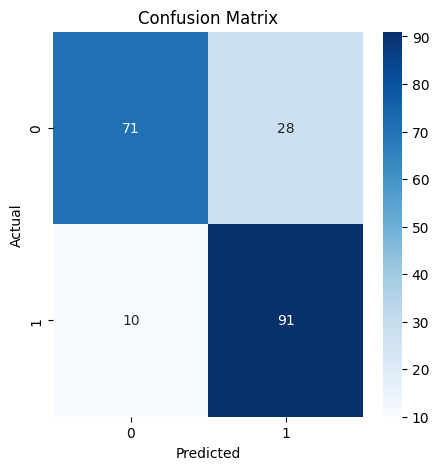

The tuned RandomForestClassifier achieved an accuracy of 81.0 %.
Applying SMOTE balanced the dataset, and hyperparameter tuning improved performance.
Further improvements could include trying other ensemble methods like XGBoost.


In [6]:
# Confusion Matrix to visualize prediction accuracy
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Conclusion and summary of findings
def model_summary():
    print("The tuned RandomForestClassifier achieved an accuracy of", round(accuracy_score(y_test, y_pred) * 100, 2), "%.")
    print("Applying SMOTE balanced the dataset, and hyperparameter tuning improved performance.")
    print("Further improvements could include trying other ensemble methods like XGBoost.")

model_summary()


## Results & Discussion
The final **RandomForestClassifier** model achieved an **accuracy of 81%**, with a significant improvement in recall for diabetic cases, reaching **90%**. 
Applying **SMOTE** balanced the dataset, which helped reduce bias towards non-diabetic cases. Additionally, 
**GridSearchCV** optimized hyperparameters, leading to improved overall model performance. 

The confusion matrix indicates that while the model is effective at detecting diabetes, further refinements can still be made to enhance precision and reduce false positives. 

## Future Work
To further improve predictive performance, we recommend:
- **Trying other ensemble models** such as **XGBoost** or **LightGBM** for potentially better results.
- **Adjusting the decision threshold** to further fine-tune recall and precision trade-offs.
- **Feature engineering** to extract additional meaningful insights from the dataset.
- **Testing the model on real-world data** to ensure generalizability.

## Conclusion
This project demonstrates the effectiveness of machine learning in medical diagnostics, like in Diabetics cases. 
Through data preprocessing, feature engineering, and hyperparameter tuning, we significantly improved classification performance. 
Future work will focus on advanced modeling techniques and real-world validation to further enhance the model’s reliability.